In [90]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

In [91]:
updated_cpdf= pd.read_csv("updated_cpdf.csv")

In [92]:
updated_cpdf.shape

(14604, 31)

In [93]:
pd.set_option('display.max_columns',None)

In [94]:
updated_cpdf.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.0,0.0,2013-06-15 00:00:00,2016-06-15,2015-01-11,2015-06-23 00:00:00,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,0.0,0.0,25.44,25.44,1.0,531.435,3.0,29.2,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,2009-08-21 00:00:00,2016-08-30,2009-08-21,2015-08-31 00:00:00,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,0.0,0.0,16.38,16.38,1.0,18.890,6.0,13.8,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0.0


## 3. Feature engineering

In [95]:
date= ["date_activ", "date_end", "date_modif_prod", "date_renewal", "price_date"]

In [96]:
for i in date:
    updated_cpdf[i] = pd.to_datetime(updated_cpdf[i])

In [97]:
updated_cpdf.dtypes

id                                        object
cons_12m                                 float64
cons_gas_12m                             float64
cons_last_month                          float64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                       float64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                  float64
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act                              float64
net_margin          

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [98]:
# Group off-peak prices by companies and month
monthly_price_by_id = updated_cpdf.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.0,0.0
3,00114d74e963e47177db89bc70108537,0.0,0.0
4,0013f326a839a2f6ad87a1859952d227,0.0,0.0


In [99]:
monthly_price_by_id.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
4,0013f326a839a2f6ad87a1859952d227,2015-01-01,0.127818,40.728885


In [100]:
jan_prices.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
4,0013f326a839a2f6ad87a1859952d227,2015-01-01,0.127818,40.728885


In [101]:
df = pd.merge(updated_cpdf, diff, on='id')

In [102]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.0,0.0,2013-06-15,2016-06-15,2015-01-11,2015-06-23,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,0.0,0.00,25.44,25.44,1.0,531.435,3.0,29.200,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1.0,0.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,0.0,0.00,16.38,16.38,1.0,18.890,6.0,13.800,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,0.0,0.00,28.60,28.60,1.0,6.600,6.0,13.856,2015-01-01,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,0.0,0.00,30.22,30.22,1.0,25.460,6.0,13.200,2015-01-01,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0.0,0.0,0.0
4,149d57cf92fc41cf94415803a877cb4b,4425.0,0.0,526.0,2010-01-13,2016-07-03,2010-01-13,2015-09-03,445.75,526.0,0.0,131.73,0.116900,0.100015,40.606701,0.0,52.32,44.91,44.91,1.0,47.980,6.0,19.800,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.0,0.0,0.0


In the dataset, we have some datetime features:

date_activ = date of activation of the contract
date_end = registered date of the end of the contract
date_modif_prod = date of the last modification of the product
date_renewal = date of the next contract renewal From these features, we can create new columns called:
tenure: the time customer uses service of PowerCo
months_activ = Number of months active until reference date (Jan 2016)
months_to_end = Number of months of the contract left until reference date (Jan 2016)
months_modif_prod = Number of months since last modification until reference date (Jan 2016)
months_renewal = Number of months since last renewal until reference date (Jan 2016)

There is tenure included in the model answer dataset which gives insight that customers who have been with PowerCo for longer than 5 months, are much less likely to churn, and vice versa. Thec churn probability is much higher for people between 0-5 months. 

In [103]:
# We no longer need the datetime columns so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date']

df = df.drop(columns=remove)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.0,0.0,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,0.0,0.00,25.44,25.44,1.0,531.435,3.0,29.200,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1.0,0.0,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,0.0,0.00,16.38,16.38,1.0,18.890,6.0,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0.0,0.0,0.0
2,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,0.0,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,0.0,0.00,28.60,28.60,1.0,6.600,6.0,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,1584.0,0.0,0.0,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,0.0,0.00,30.22,30.22,1.0,25.460,6.0,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0.0,0.0,0.0
4,149d57cf92fc41cf94415803a877cb4b,4425.0,0.0,526.0,445.75,526.0,0.0,131.73,0.116900,0.100015,40.606701,0.0,52.32,44.91,44.91,1.0,47.980,6.0,19.800,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.0,0.0,0.0


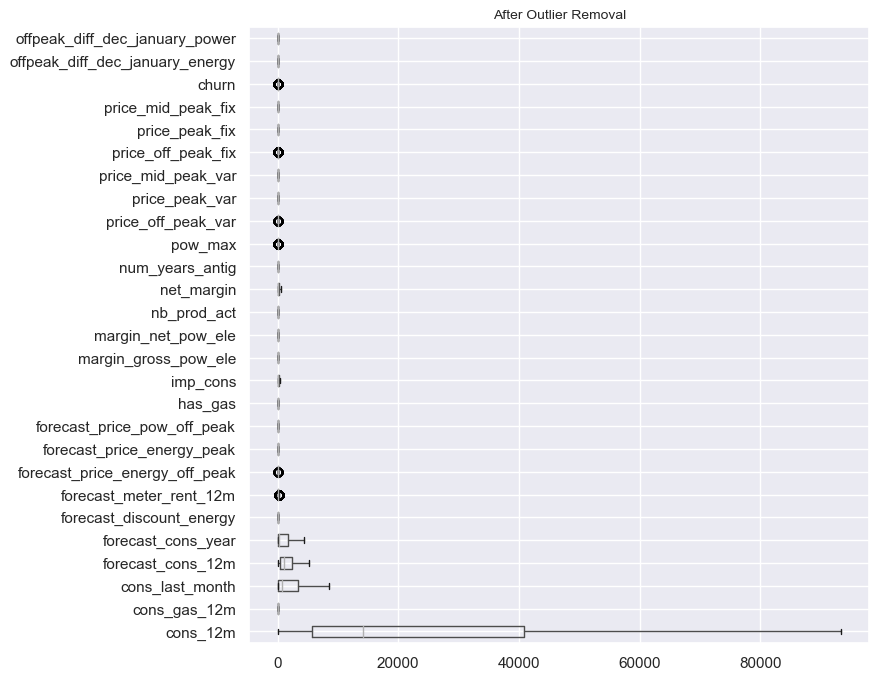

In [104]:
plt.figure(figsize=(8,8))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=10)
plt.show();

#### Splitting The Data into Train and Test Sets for Modelling purposes. 

In [105]:
# Separate target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [106]:
from sklearn.model_selection import train_test_split
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10222
Test cases: 4382


In [107]:
y.value_counts()

0.0    13185
1.0     1419
Name: churn, dtype: int64

#### We can see that the number of churn and not churn is imbalanced. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique to solve the this problem.

In [108]:
df['churn'] = df['churn'].astype(int)
y= y.astype(int)

In [109]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [110]:
y.value_counts()

1    13185
0    13185
Name: churn, dtype: int64

In [111]:
#check the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 13185, 0: 13185})


In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10222, 26)
(10222,)
(4382, 26)
(4382,)


### Random Forest Classifier

In [113]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn import metrics

In [114]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


#### Prediction on Test Data

In [115]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)

#### Accuracy Metrics

In [116]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 12
False positives: 1
True negatives: 3974
False negatives: 395



In [117]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

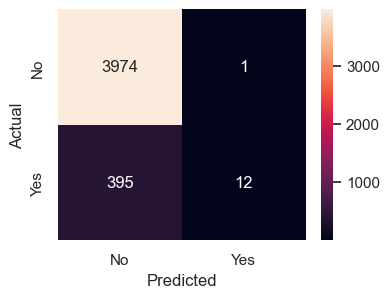

In [118]:
cm = metrics.confusion_matrix(y_test, y_pred_RF,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [119]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3975
         1.0       0.92      0.03      0.06       407

    accuracy                           0.91      4382
   macro avg       0.92      0.51      0.50      4382
weighted avg       0.91      0.91      0.87      4382



In [120]:
print('Accuracy:', round(accuracy_score(y_test, y_pred_RF), 4))
print("Overall Precision:", round(precision_score(y_test, y_pred_RF),4))
print("Overall Recall:", round(recall_score(y_test, y_pred_RF),4))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print(f'AUC: {auc:.4f}')

Accuracy: 0.9096
Overall Precision: 0.9231
Overall Recall: 0.0295
AUC: 0.6801


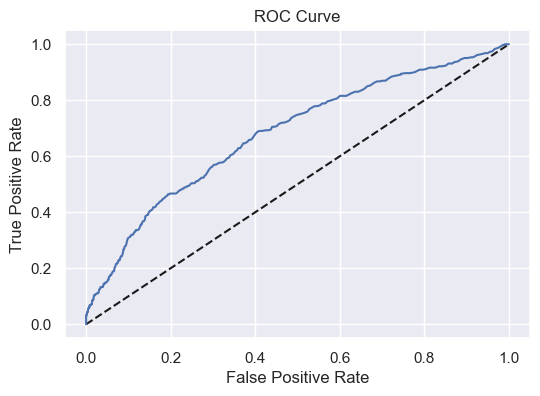

In [121]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])
# plot ROC curve
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [122]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 12
False positives: 1
True negatives: 3974
False negatives: 395



### Fine Tuned Random Forest Classifier Model

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [129]:
# Create the final model with the best hyperparameters
best_model_RF = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_split=2, min_samples_leaf=1)

# Fit the final model on the entire training dataset
best_model_RF.fit(X_train, y_train)

Validation Accuracy: 0.9919780864801409


In [130]:
# Evaluate the final model on the validation set or using cross-validation
validation_accuracy = best_model_RF.score(X_train, y_train)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.9919780864801409


#### Prediction on Test Data

In [133]:
y_FT_pred_RF = best_model_RF.predict(X_test)
y_FT_scores_RF = best_model_RF.predict_proba(X_test)

#### Accuracy Metrics

In [134]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_FT_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 10
False positives: 1
True negatives: 3974
False negatives: 397



In [135]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

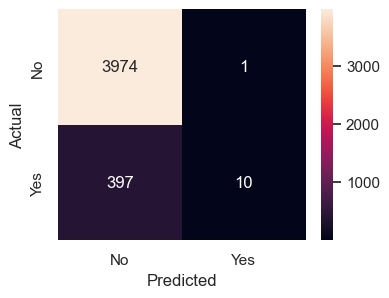

In [136]:
cm = metrics.confusion_matrix(y_test, y_FT_pred_RF,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [137]:
print(classification_report(y_test, y_FT_pred_RF))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3975
         1.0       0.91      0.02      0.05       407

    accuracy                           0.91      4382
   macro avg       0.91      0.51      0.50      4382
weighted avg       0.91      0.91      0.87      4382



In [138]:
print('Accuracy:', round(accuracy_score(y_test, y_FT_pred_RF), 4))
print("Overall Precision:", round(precision_score(y_test, y_FT_pred_RF),4))
print("Overall Recall:", round(recall_score(y_test, y_FT_pred_RF),4))
auc = roc_auc_score(y_test,y_FT_scores_RF[:,1])
print(f'AUC: {auc:.4f}')

Accuracy: 0.9092
Overall Precision: 0.9091
Overall Recall: 0.0246
AUC: 0.6813


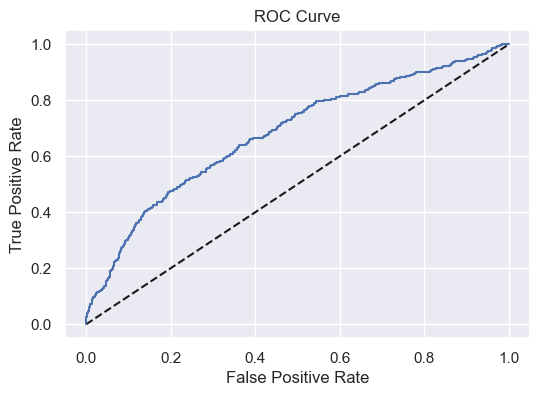

In [139]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_FT_scores_RF[:,1])
# plot ROC curve
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [140]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_FT_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 10
False positives: 1
True negatives: 3974
False negatives: 397



### Model_2 Interpretation:

In [142]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

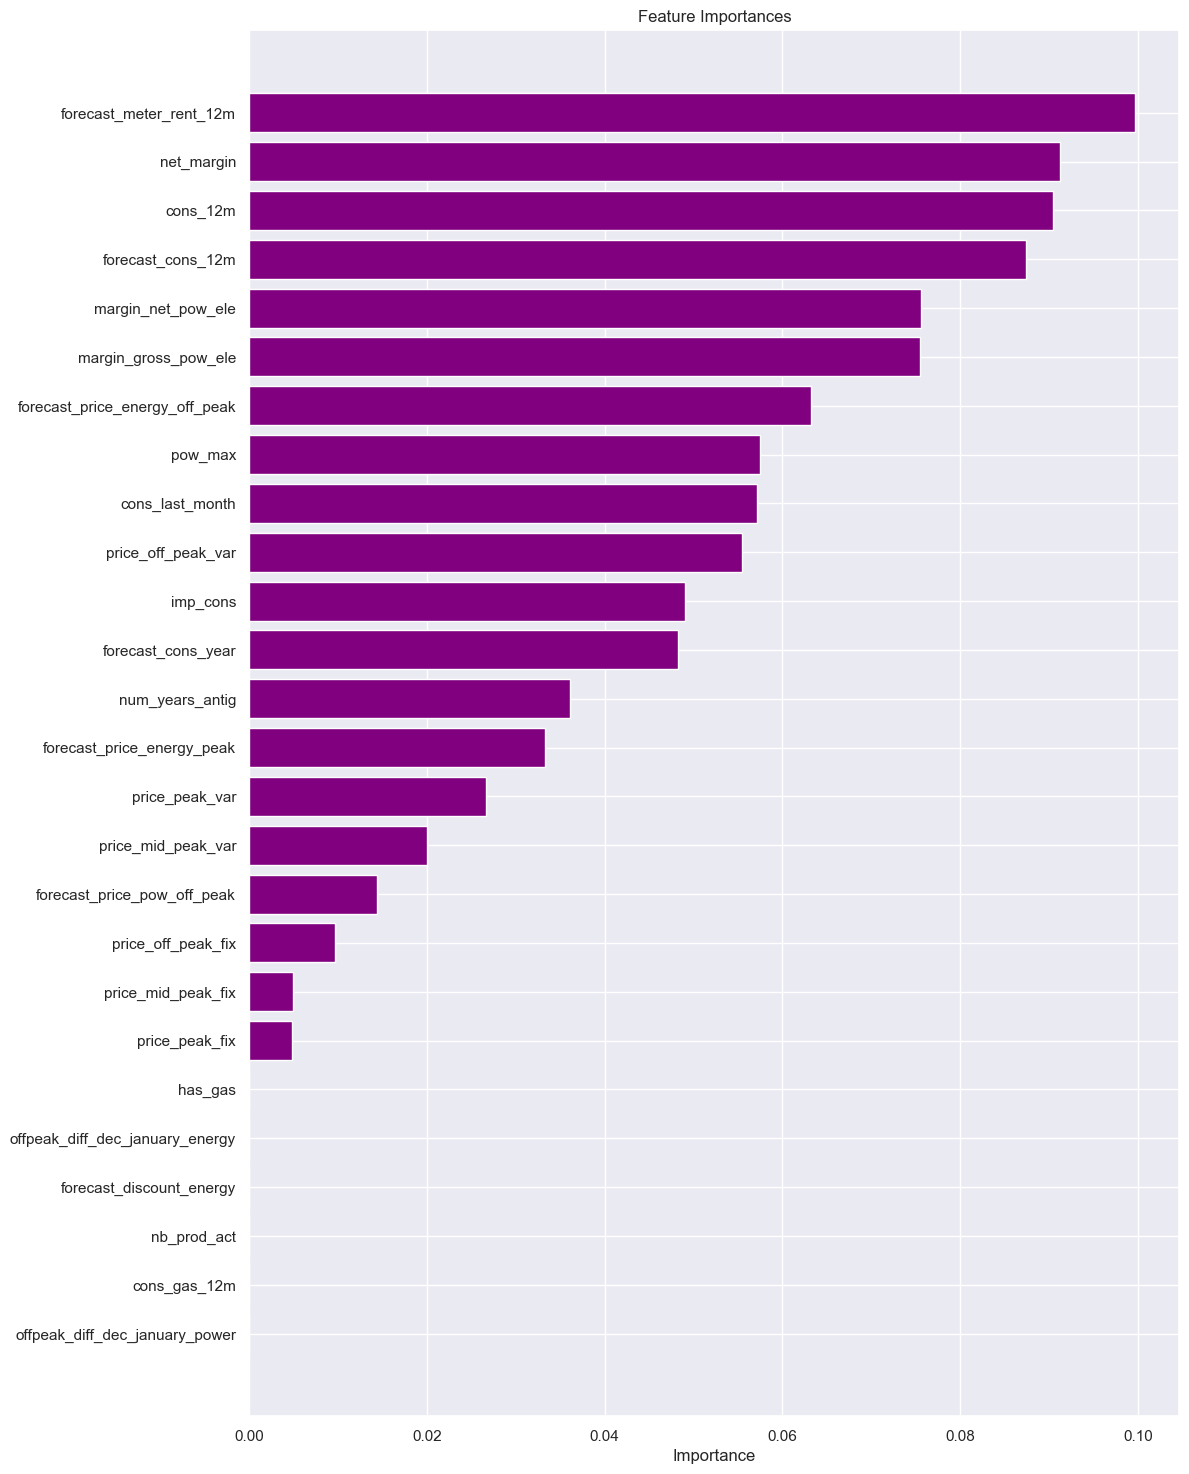

In [143]:
plt.figure(figsize=(12, 18))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show();

## Model_1 Interpretation:

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

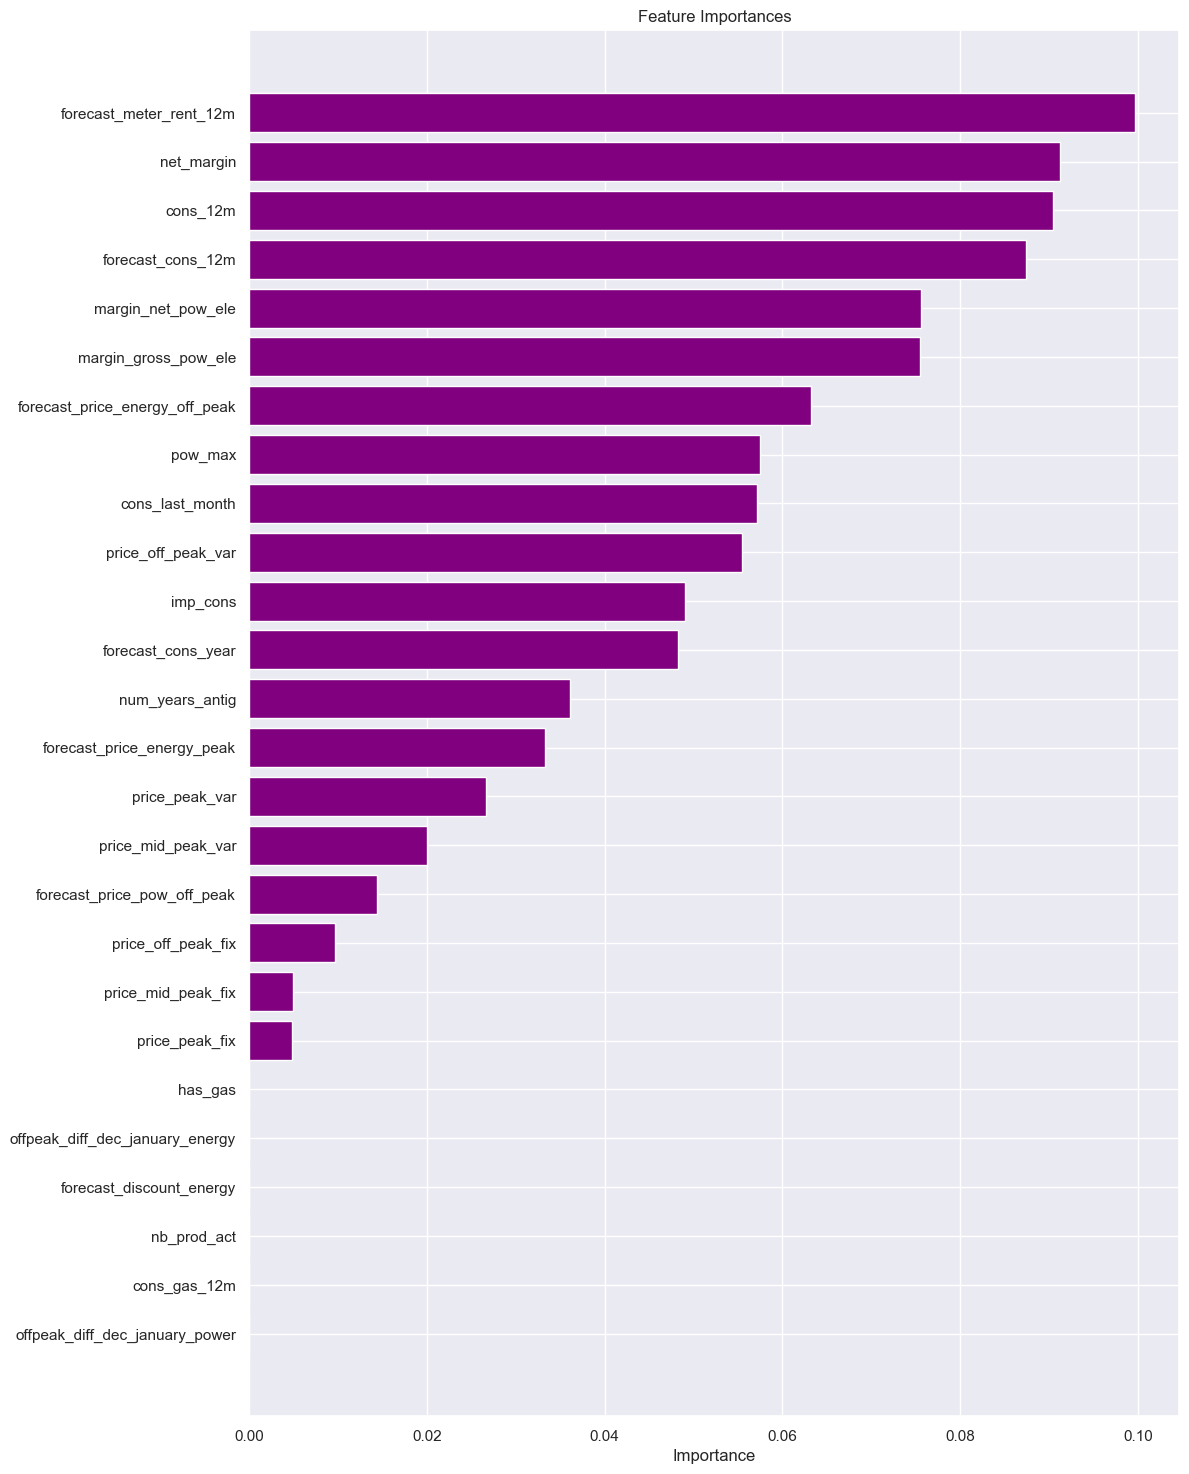

In [145]:
plt.figure(figsize=(12, 18))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show();

From this chart, we can observe the following points:
the following 4 features are the top features important in the predictive model:
    
- forecast meter rent 12 month 
- Consumption over 12 months
- Net margin also plays an important role in the predictive model. 
- Forecast of Consumption in the next 12 months 

Our price sensitivity features are scattered around but are not the main driver for a customer churning. 

1. Ensure you’re able to explain the performance of your model, where did the model underperform?

The model underperforms True positives, False positives and False Negatives.
- Looking at the true negatives, we have 3973 out of 3989. This is great!

- Looking at the false negatives, 395 is too high.

- Looking at false positives, we can see there are only 2, this is bad.

- With the true positives, we correctly identify 12 of those 393, which is very poor.

- Looking at the accuracy score, this is very misleading, looking at the precision score and recall score 29%, precision score shows us a score of 85% which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

- The AUC 67% is better a little bit. 

2. Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
These evaluation metrics chosen are: Classification Report, Confusion Matrix, AUC, ROC score and Feature Importances. 

The Classification Report contains Overall Precision score(Performance of the Classification Model), 
Overall Accuracy( of the model, 
Recall Score(predicts the actual values), 
and f-1 Score( Which is a Combination of Precision and Recall Score).
The Classification Report helped us find out the accuracy of the model used, and the recall score to correctly predict how many will churn. 
Confusion Matrix gave us the scores of correctly predicted scores of customers who will churn, vs. the score of incorrectly predicted score of customers who will not churn. 
AUC and ROC Score a single summary metric of overall model performance, where higher values are better.

ROC curve gives you insights into the model's performance at various threshold levels, helped me choose a threshold that meets your specific trade-off between false positives and true positives.

Both metrics are valuable for evaluating the performance of binary classification models, and they complement each other in providing a comprehensive assessment of a model's discriminatory power.

Feature Importance gave us the variables which might be the top contributors to churn. And also gave us the reassurance that price is infact not the main concern or reason for churn. It is other variables. 

3. Document the advantages and disadvantages of using the Random Forest for this use case.
Advantages of using the Random Forest Classfier: Was able to correctly identify true negatives. 
Disadvantages : The model shows a deceiving 91% accuracy. And when we check the tpr, fpr and false ngative rates, we see the score is very poor and needs to be improved. 

4. Do you think that the model performance is satisfactory? Give justification for your answer.
Ya, the model performance is just satisfactory. as the AUC Score suggests 60%. Unless we improve on the score of tpr, fpr and fn score, it would not be possible to deploy this model. Also, parameter tuning, and checking other models and their parameter tuning might just help in figuring out which customers might churn or not. 

5. (Bonus) - Relate the model performance to the client's financial performance with the introduction of the discount proposition. How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion? 

As money is not the primary factor leading to churn, providing 20% to customers might be a futile decision, leading to revenue loss. 